In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from config import gkey

In [2]:
df = pd.read_csv("Zomato_Restaurants_All_Consolidated-Types.csv")
df

,Unnamed: 0,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,0,Soul Cafe,3.0,Cafe,3,-37.813075,144.965281,1,Bourke Street Mall (North)
1,1,Song Tea,3.5,Beverages,1,-37.813810,144.965600,1,Bourke Street Mall (North)
2,2,Sensory Lab - Bourke Street,3.4,Cafe,2,-37.813398,144.964499,1,Bourke Street Mall (North)
3,3,SamSam,4.0,Restaurant,3,-37.812885,144.965210,1,Bourke Street Mall (North)
4,4,Boost Juice,3.7,Beverages,1,-37.813798,144.965849,1,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...,...
100,115,The Borek Bakehouse,4.4,Bakery,1,-37.807711,144.960005,26,QV Market-Elizabeth St (West)
101,116,Chickcha,3.7,Cafe,2,-37.809073,144.961767,26,QV Market-Elizabeth St (West)
102,117,Damiao Panda Fan 大妙火锅 · 川菜,3.0,Restaurant,3,-37.809614,144.961199,26,QV Market-Elizabeth St (West)
103,118,Mansae Korean BBQ & Bar,4.5,Restaurant,4,-37.809563,144.959607,26,QV Market-Elizabeth St (West)


In [3]:
types = df["Type"].unique()
types.sort()
types

array(['Bakery', 'Bar', 'Beverages', 'Cafe', 'Desserts', 'Fast Food',
       'Pub', 'Restaurant'], dtype=object)

In [4]:
# Create empty list to fill with restaurant type data (for plotting)
# sensor_1 = {}
# sensor_2 = {}
# sensor_3 = {}

sensor_1_loc = df.loc[df["Sensor"] == "Bourke Street Mall (North)",:]
sensor_2_loc = df.loc[df["Sensor"] == "Flinders St-Spark La",:]
sensor_3_loc = df.loc[df["Sensor"] == "QV Market-Elizabeth St (West)",:]

sensor_1 = pd.DataFrame(sensor_1_loc["Type"].value_counts()).sort_index().reset_index()
sensor_2 = pd.DataFrame(sensor_2_loc["Type"].value_counts()).sort_index().reset_index()
sensor_3 = pd.DataFrame(sensor_3_loc["Type"].value_counts()).sort_index().reset_index()


In [5]:
merge_1 = pd.merge(sensor_1,sensor_2, how="outer", on="index")
merge = pd.merge(merge_1,sensor_3, how="outer", on="index")
merge = merge.rename(columns={"Type_x":"Bourke Street Mall (North)",
                              "Type_y":"Flinders St-Spark La",
                              "Type":"QV Market-Elizabeth St (West)"
                             }).fillna(0)
sensors_df = merge.sort_values(by="index")
sensors_df

,index,Bourke Street Mall (North),Flinders St-Spark La,QV Market-Elizabeth St (West)
0,Bakery,1.0,0.0,2.0
5,Bar,0.0,2.0,1.0
1,Beverages,7.0,2.0,5.0
2,Cafe,9.0,12.0,4.0
3,Desserts,1.0,1.0,1.0
6,Fast Food,0.0,2.0,0.0
7,Pub,0.0,0.0,1.0
4,Restaurant,14.0,17.0,23.0


In [6]:
x_axis = sensors_df["index"].tolist()
x_axis

['Bakery',
 'Bar',
 'Beverages',
 'Cafe',
 'Desserts',
 'Fast Food',
 'Pub',
 'Restaurant']

In [11]:
sensors = sensors_df.set_index("index")
sensors_transposed = sensors.T
sensors_day = sensors_transposed[["Bakery","Beverages","Cafe","Fast Food"]]
sensors_night = sensors_transposed[["Bar","Desserts","Pub","Restaurant"]]

sensors_day

index,Bakery,Beverages,Cafe,Fast Food
Bourke Street Mall (North),1.0,7.0,9.0,0.0
Flinders St-Spark La,0.0,2.0,12.0,2.0
QV Market-Elizabeth St (West),2.0,5.0,4.0,0.0


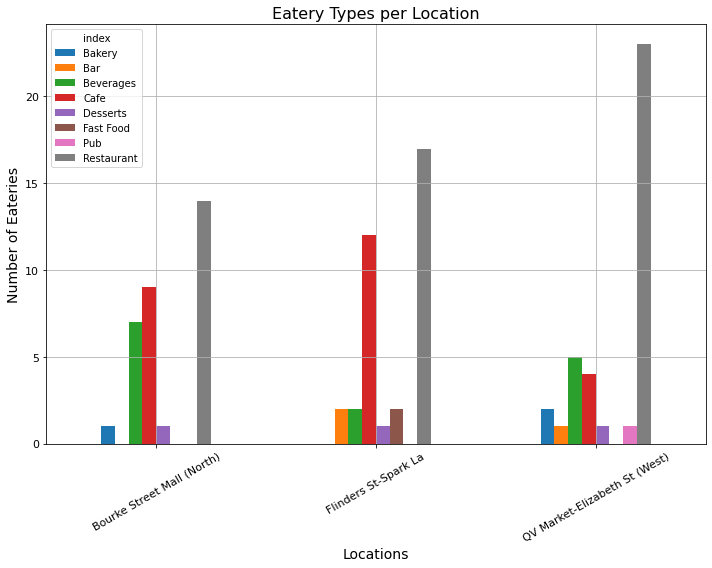

In [31]:
# Create a bar chart based off of the group series from before
count_chart = sensors_transposed.plot(kind='bar',rot=30,fontsize=11, figsize=(10,8), grid=True)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Locations", fontsize=14)
count_chart.set_ylabel("Number of Eateries",fontsize=14)
count_chart.set_title("Eatery Types per Location", fontsize=16)
plt.tight_layout()
count_chart_d.get_figure()
count_chart.figure.savefig("types_bar_separate.png")

plt.show()


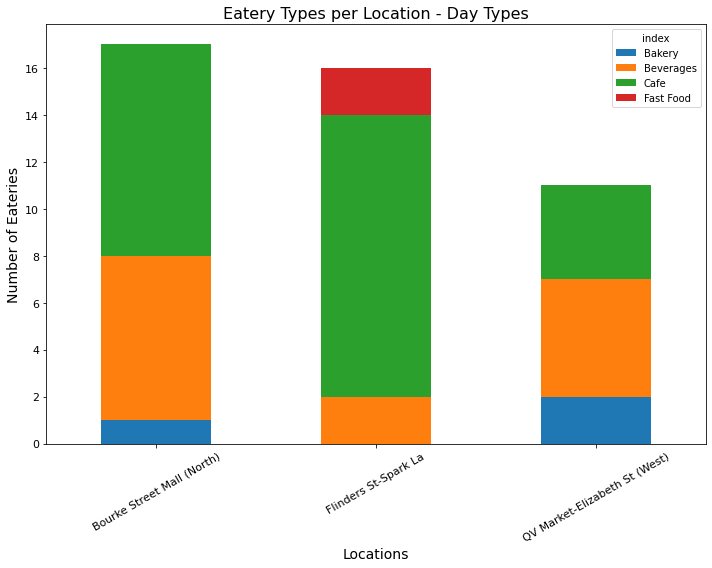

In [28]:
# Create a bar chart based off of the group series from before
#count_chart = sensors_transposed.plot(kind='bar',rot=30,fontsize=11, figsize=(15,10), grid=True)
count_chart_d = sensors_day.plot.bar(stacked=True, rot=30,fontsize=11, figsize=(10,8))

# Set the xlabel and ylabel using class methods
count_chart_d.set_xlabel("Locations", fontsize=14)
count_chart_d.set_ylabel("Number of Eateries",fontsize=14)
count_chart_d.set_title("Eatery Types per Location - Day Types", fontsize=16)
plt.tight_layout()
count_chart_d.get_figure()
#count_chart.figure.savefig("types_bar_separate.png")
count_chart_d.figure.savefig("types_bar_stacked_day.png")

plt.show()


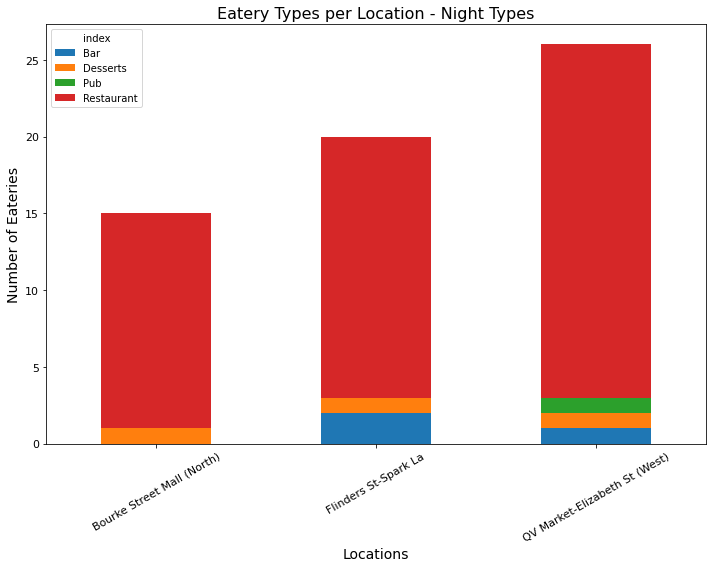

In [29]:
# Create a bar chart based off of the group series from before
#count_chart = sensors_transposed.plot(kind='bar',rot=30,fontsize=11, figsize=(15,10), grid=True)
count_chart_n = sensors_night.plot.bar(stacked=True, rot=30,fontsize=11, figsize=(10,8))

# Set the xlabel and ylabel using class methods
count_chart_n.set_xlabel("Locations", fontsize=14)
count_chart_n.set_ylabel("Number of Eateries",fontsize=14)
count_chart_n.set_title("Eatery Types per Location - Night Types", fontsize=16)
plt.tight_layout()
count_chart_n.get_figure()
#count_chart.figure.savefig("types_bar_separate.png")
count_chart_n.figure.savefig("types_bar_stacked_n.png")

plt.show()


In [228]:
? pd.DataFrame.plot

In [44]:
sensor_group = df.groupby(["Sensor", "Type"]).count()
sensor_group

Unnamed: 0  Name  Aggregate Rating  \
Sensor                        Type                                             
Bourke Street Mall (North)    Bakery               1     1                 1   
                              Beverages            7     7                 7   
                              Cafe                 9     9                 9   
                              Desserts             1     1                 1   
                              Restaurant          14    14                14   
Flinders St-Spark La          Bar                  2     2                 2   
                              Beverages            2     2                 2   
                              Cafe                12    12                12   
                              Desserts             1     1                 1   
                              Fast Food            2     2                 2   
                              Restaurant          17    17                17   
QV Market-Elizabeth St (West) Bakery               2     2                 2   
                              Bar                  1     1                 1   
                              Beverages            5     5                 5   
                              Cafe                 4     4                 4   
                              Desserts             1     1                 1   
                              Pub                  1     1                 1   
                              Restaurant          23    23                23   

                                          Price  Latitude  Longitude  \
Sensor                        Type                                     
Bourke Street Mall (North)    Bakery          1         1          1   
                              Beverages       7         7          7   
                              Cafe            9         9          9   
                              Desserts        1         1          1   
                              Restaurant     14        14         14   
Flinders St-Spark La          Bar             2         2          2   
                              Beverages       2         2          2   
                              Cafe           12        12         12   
                              Desserts        1         1          1   
                              Fast Food       2         2          2   
                              Restaurant     17        17         17   
QV Market-Elizabeth St (West) Bakery          2         2          2   
                              Bar             1         1          1   
                              Beverages       5         5          5   
                              Cafe            4         4          4   
                              Desserts        1         1          1   
                              Pub             1         1          1   
                              Restaurant     23        23         23   

                                          Sensor ID  
Sensor                        Type                   
Bourke Street Mall (North)    Bakery              1  
                              Beverages           7  
                              Cafe                9  
                              Desserts            1  
                              Restaurant         14  
Flinders St-Spark La          Bar                 2  
                              Beverages           2  
                              Cafe               12  
                              Desserts            1  
                              Fast Food           2  
                              Restaurant         17  
QV Market-Elizabeth St (West) Bakery              2  
                              Bar                 1  
                              Beverages           5  
                              Cafe                4  
                              Desserts            1  
                            

In [47]:
columns = list(df.columns)
columns

['Unnamed: 0',
 'Name',
 'Aggregate Rating',
 'Type',
 'Price',
 'Latitude',
 'Longitude',
 'Sensor ID',
 'Sensor']

In [ ]:
averaged = df.groupby("Sensor ID")[['Name', 'Aggregate Rating', 'Type', 'Price']].mean()
averaged.head()

In [7]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [46]:
bakery_df = df.loc[df["Type"]=="Bakery",:]
bar_df = df.loc[df["Type"]=="Bar",:]
beverages_df = df.loc[df["Type"]=="Beverages",:]
cafe_df = df.loc[df["Type"]=="Cafe",:]


In [47]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
# info_box_template = """
# <dl>
# <dt>Name</dt><dd>{Name}</dd>
# <dt>Type</dt><dd>{Type}</dd>
# <dt>Rating</dt><dd>{Aggregate Rating}</dd>
# <dt>Price</dt><dd>{Price}</dd>
# <dt>Sensor</dt><dd>{Sensor}</dd>
# </dl>
# """
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
#eatery_info = [info_box_template.format(**row) for index, row in df.iterrows()]
locations_bakery = bakery_df[["Latitude", "Longitude"]]
locations_bar = bar_df[["Latitude", "Longitude"]]
locations_beverages = beverages_df[["Latitude", "Longitude"]]
locations_cafe = cafe_df[["Latitude", "Longitude"]]

In [49]:
locations_cafe

,Latitude,Longitude
0,-37.813075,144.965281
2,-37.813398,144.964499
6,-37.813165,144.965886
12,-37.814117,144.965801
21,-37.814833,144.972896
25,-37.814372,144.973065
26,-37.814471,144.972929
29,-37.814337,144.972831
33,-37.814324,144.972700
47,-37.808025,144.960451


In [51]:
# Assign the marker layer to a variable
markers_0 = gmaps.symbol_layer(locations_bakery,fill_color='rgba(0, 150, 0, 0.4)', stroke_color='rgba(0, 150, 0, 0.4)')
markers_1 = gmaps.symbol_layer(locations_bar,fill_color='rgba(50, 150, 0, 0.4)', stroke_color='rgba(50, 150, 0, 0.4)')
markers_2 = gmaps.symbol_layer(locations_beverages,fill_color='rgba(0, 100, 50, 0.4)', stroke_color='rgba(0, 100, 50, 0.4)')
markers_3 = gmaps.symbol_layer(locations_cafe,fill_color='rgba(90, 0, 40, 0.4)', stroke_color='rgba(90, 0, 40, 0.4)')

# Plot Heatmap
fig = gmaps.figure()

# Add marker layer ontop of heat map
fig.add_layer(markers_0)
fig.add_layer(markers_1)
fig.add_layer(markers_2)
fig.add_layer(markers_3)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
melb_df = pd.read_csv("Melb_City_Restaurants.csv")
melb_df